# Predict Health Insurance Cost

## Business Case:
 Predict Health Insurance cost for an individual based on Age, BMI, Children, Smoker, Region

## Objectives
<li>Predict the insurance cost</li>
<li>Which factor(s) drives the cost most </li>
<li>How age and BMI relats to cost </li>
<li>How region impacts to cost </li>
<li>Does smoking habit play any role in cost </li>
<li>Train using Amazon Sage Maker Linear Learner Model</li>

## Machine Learning methodologies to use
<li>Miltiple Linear Regression Model</li>
<li>Correlation Matrix </li>

## References used
<li>[Markdown icons](https://github.com/e2eSolutionArchitect/scripts/blob/main/markdown/icons.md)</li>


## Hot Keys
<li>Shift + R = Shows the output cells in side column</li>

## Machine Learning methodologies to use
<li>Miltiple Linear Regression Model</li>
<li>Correlation Matrix </li>

## Install Libraries
If required, run the below commands to install the libraries before importing

In [77]:
# pip install seaborn 

## Import Libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Set Dataset

In [83]:
ins_df = pd.read_csv('health_insurance.csv')
ins_df.head(7)
#ins_df.tail(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


## Perform Exploratory Data Analysis ( EDA)

In [86]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [88]:
ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### ***Please write your findings here***
--------

In [91]:
size= ins_df.size
shape = ins_df.shape
print("Size {}".format(size))
print("Shape {}".format(shape))

Size 9366
Shape (1338, 7)


In [93]:
ins_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### ***Please write your findings here***
--------

In [66]:
# Check NaN value in dataset
df_nan=ins_df[ins_df.isna().any(axis=1)]
df_nan.head()

,age,sex,bmi,children,smoker,region,charges


### ***Please write your findings here***
--------

<Axes: >

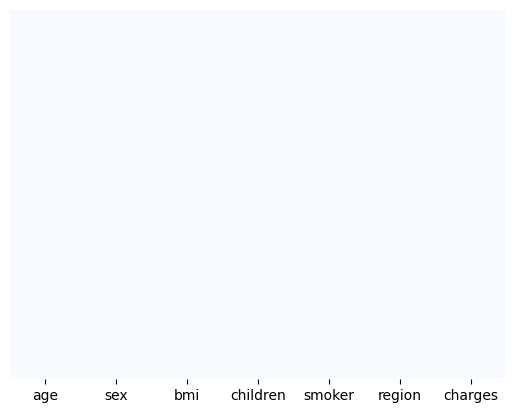

In [117]:
# Check if any Null values in dataset
sns.heatmap(ins_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

### ***Please write your findings here***
--------

In [132]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [136]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [142]:
ins_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [144]:
ins_df['sex'] = ins_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [152]:
ins_df['smoker'] = ins_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [154]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [156]:
# Group by Region
df_region = ins_df.groupby(by='region').mean()
df_region

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,39.268519,0.503086,29.173503,1.046296,0.206790,13406.384516
northwest,39.196923,0.495385,29.199785,1.147692,0.178462,12417.575374
southeast,38.939560,0.519231,33.355989,1.049451,0.250000,14735.411438
southwest,39.455385,0.501538,30.596615,1.141538,0.178462,12346.937377


In [164]:
ins_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [188]:
reg_dum = pd.get_dummies(ins_df['region'], drop_first = True )
reg_dum

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [190]:
reg_dum['northwest'] = reg_dum['northwest'].apply(lambda x: 0 if x == False else 1)

In [194]:
reg_dum['southeast'] = reg_dum['southeast'].apply(lambda x: 0 if x == False else 1)
reg_dum['southwest'] = reg_dum['southwest'].apply(lambda x: 0 if x == False else 1)

In [202]:
reg_dum

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [204]:
ins_df = pd.concat([ins_df,reg_dum],axis =1)
ins_df.head()

In [208]:
ins_df.drop(['region'],axis=1,inplace=True)
ins_df.head()

In [210]:
ins_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [212]:
# Group by Age
df_age = ins_df.groupby(by='age').mean()
df_age

,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,,,,,,,,
18,0.521739,31.326159,0.449275,0.173913,7086.217556,0.000000,0.536232,0.000000
19,0.514706,28.596912,0.426471,0.264706,9747.909335,0.500000,0.044118,0.455882
20,0.517241,30.632759,0.862069,0.310345,10159.697736,0.241379,0.275862,0.275862
21,0.535714,28.185714,0.785714,0.071429,4730.464330,0.250000,0.250000,0.250000
22,0.535714,31.087679,0.714286,0.214286,10012.932802,0.250000,0.285714,0.214286
23,0.500000,31.454464,1.000000,0.250000,12419.820040,0.250000,0.250000,0.250000
24,0.500000,29.142679,0.464286,0.214286,10648.015962,0.250000,0.250000,0.250000
25,0.535714,29.693929,1.285714,0.178571,9838.365311,0.250000,0.250000,0.250000
26,0.535714,29.428929,1.071429,0.107143,6133.825309,0.250000,0.250000,0.250000


## Visualization

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


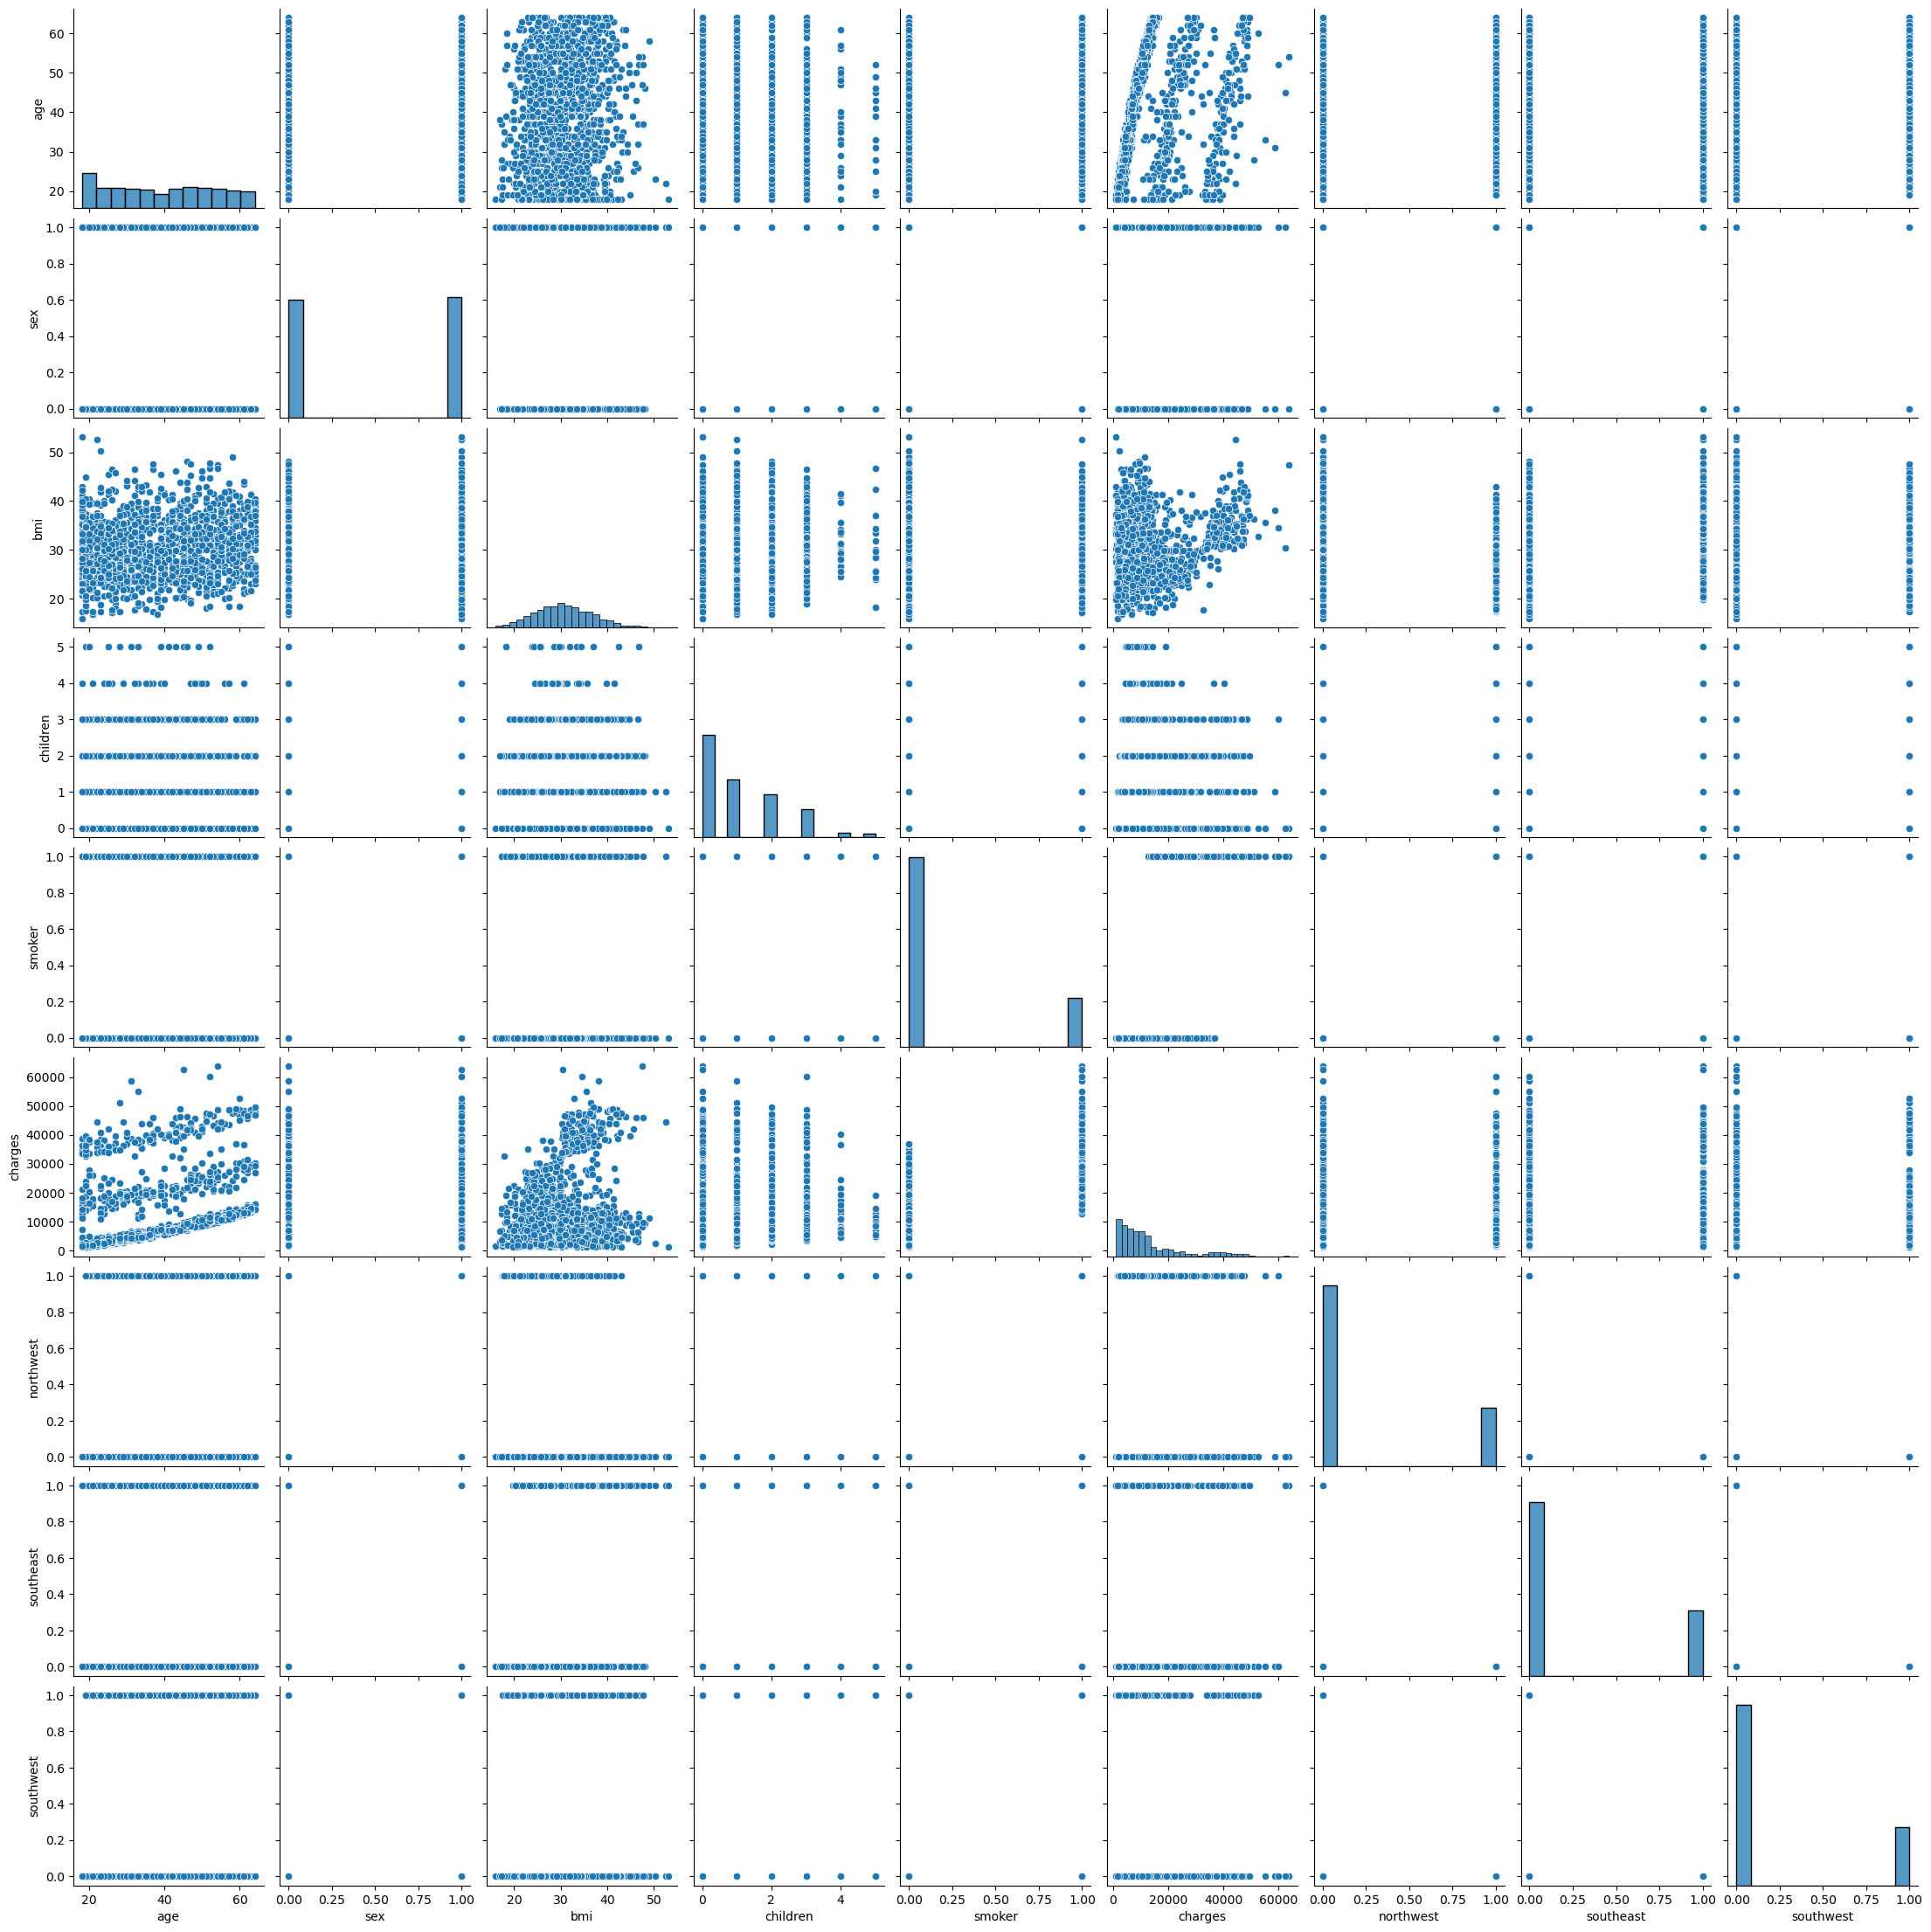

In [216]:
sns.pairplot(ins_df)

array([[<Axes: title={'center': 'bmi'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'children'}>]], dtype=object)

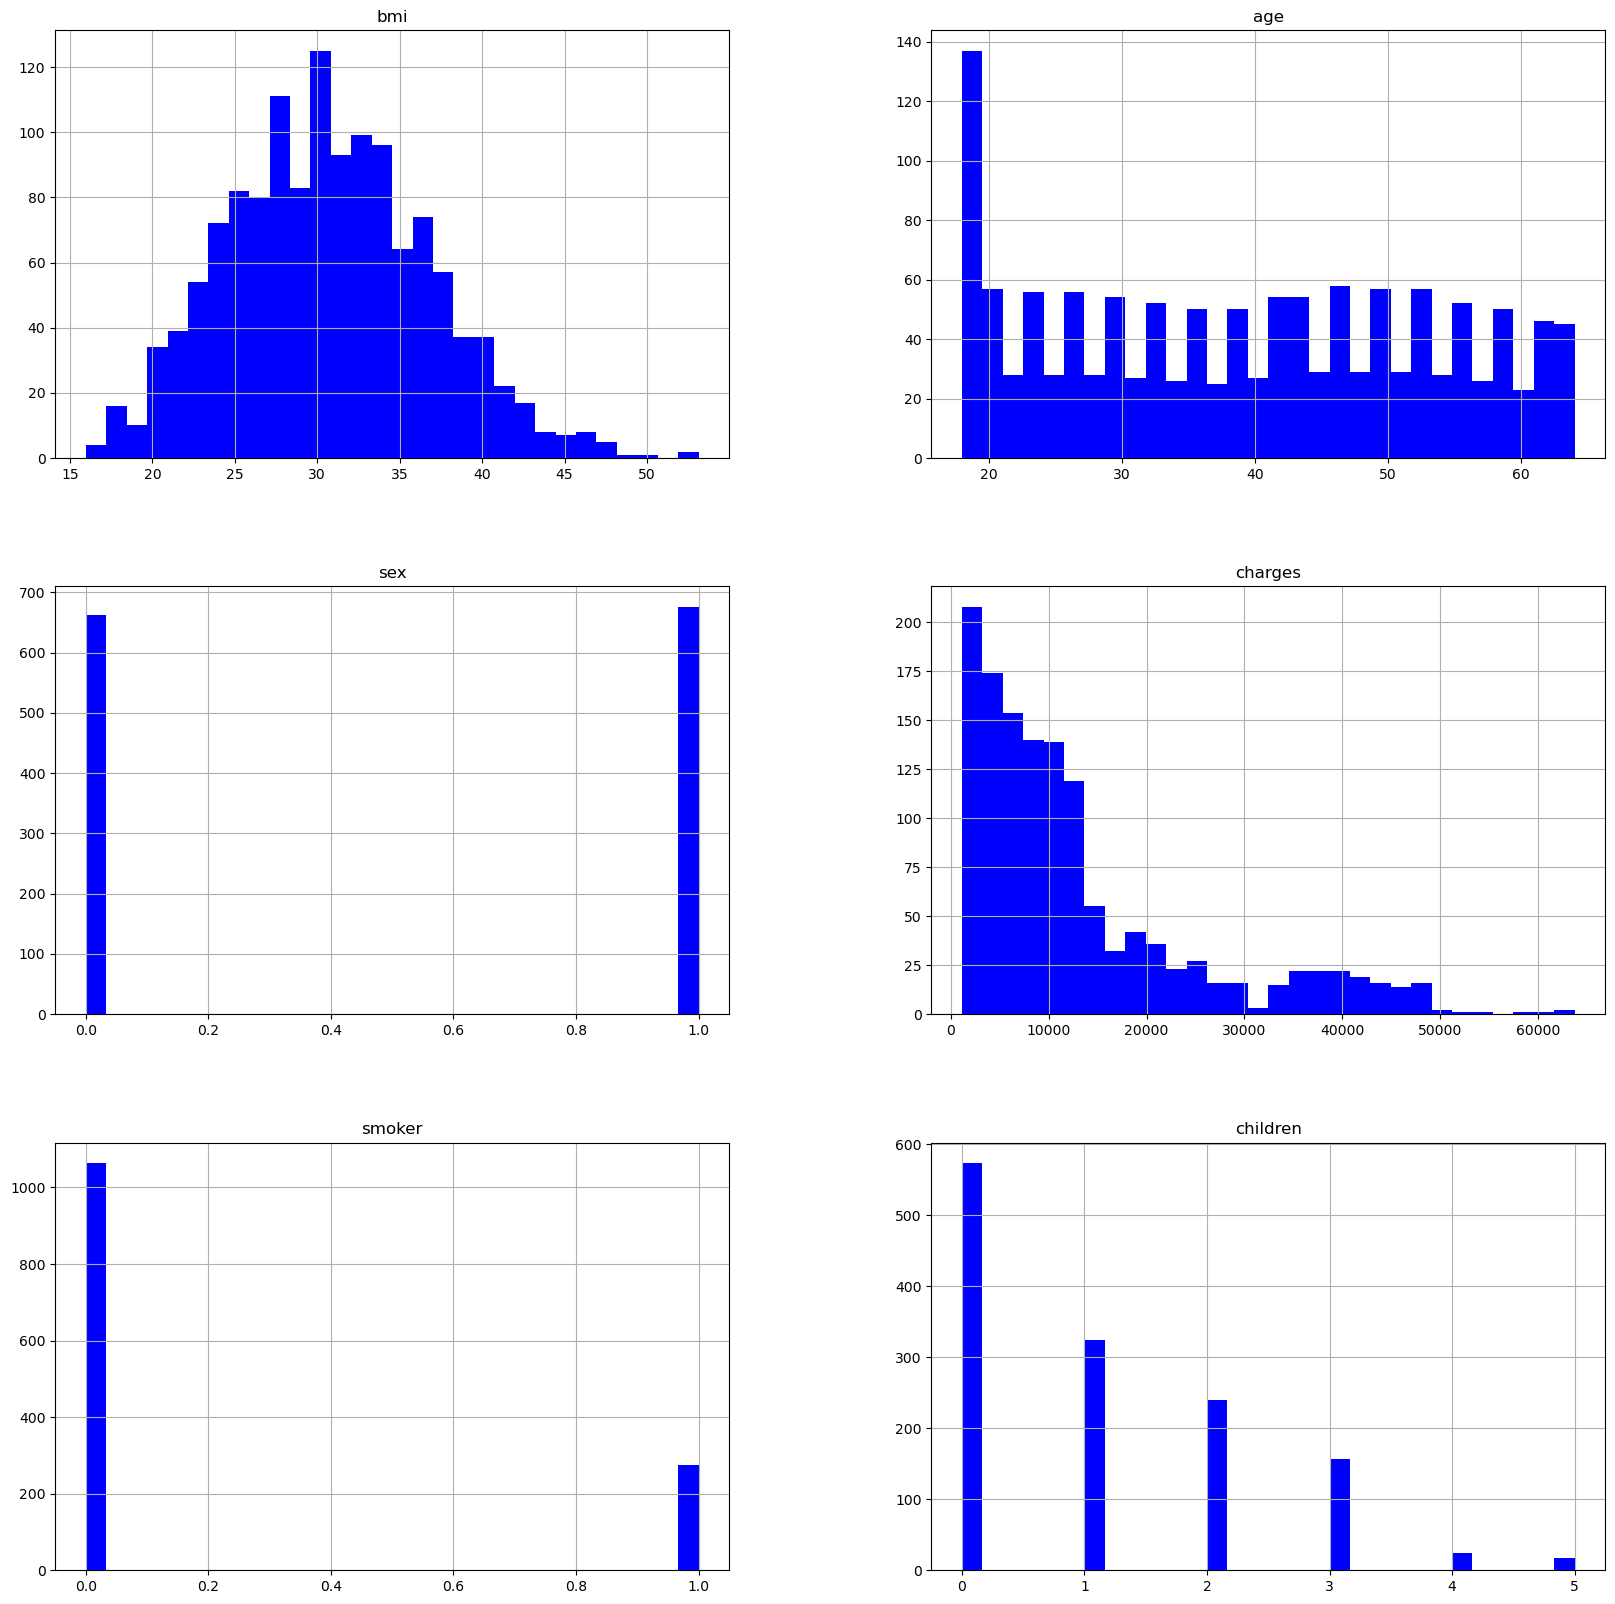

In [220]:
ins_df[['bmi', 'age', 'sex','charges','smoker','children']].hist(bins=30,figsize =(20,20), color = 'blue' )

<Axes: xlabel='age', ylabel='charges'>

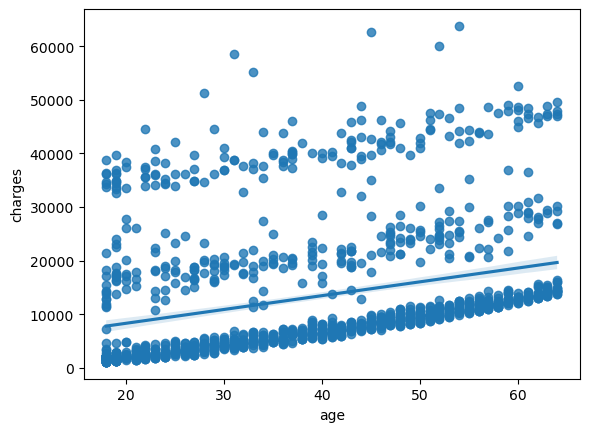

In [227]:
sns.regplot(x='age', y= 'charges', data=ins_df)

In [229]:
corr= ins_df.corr()
corr

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

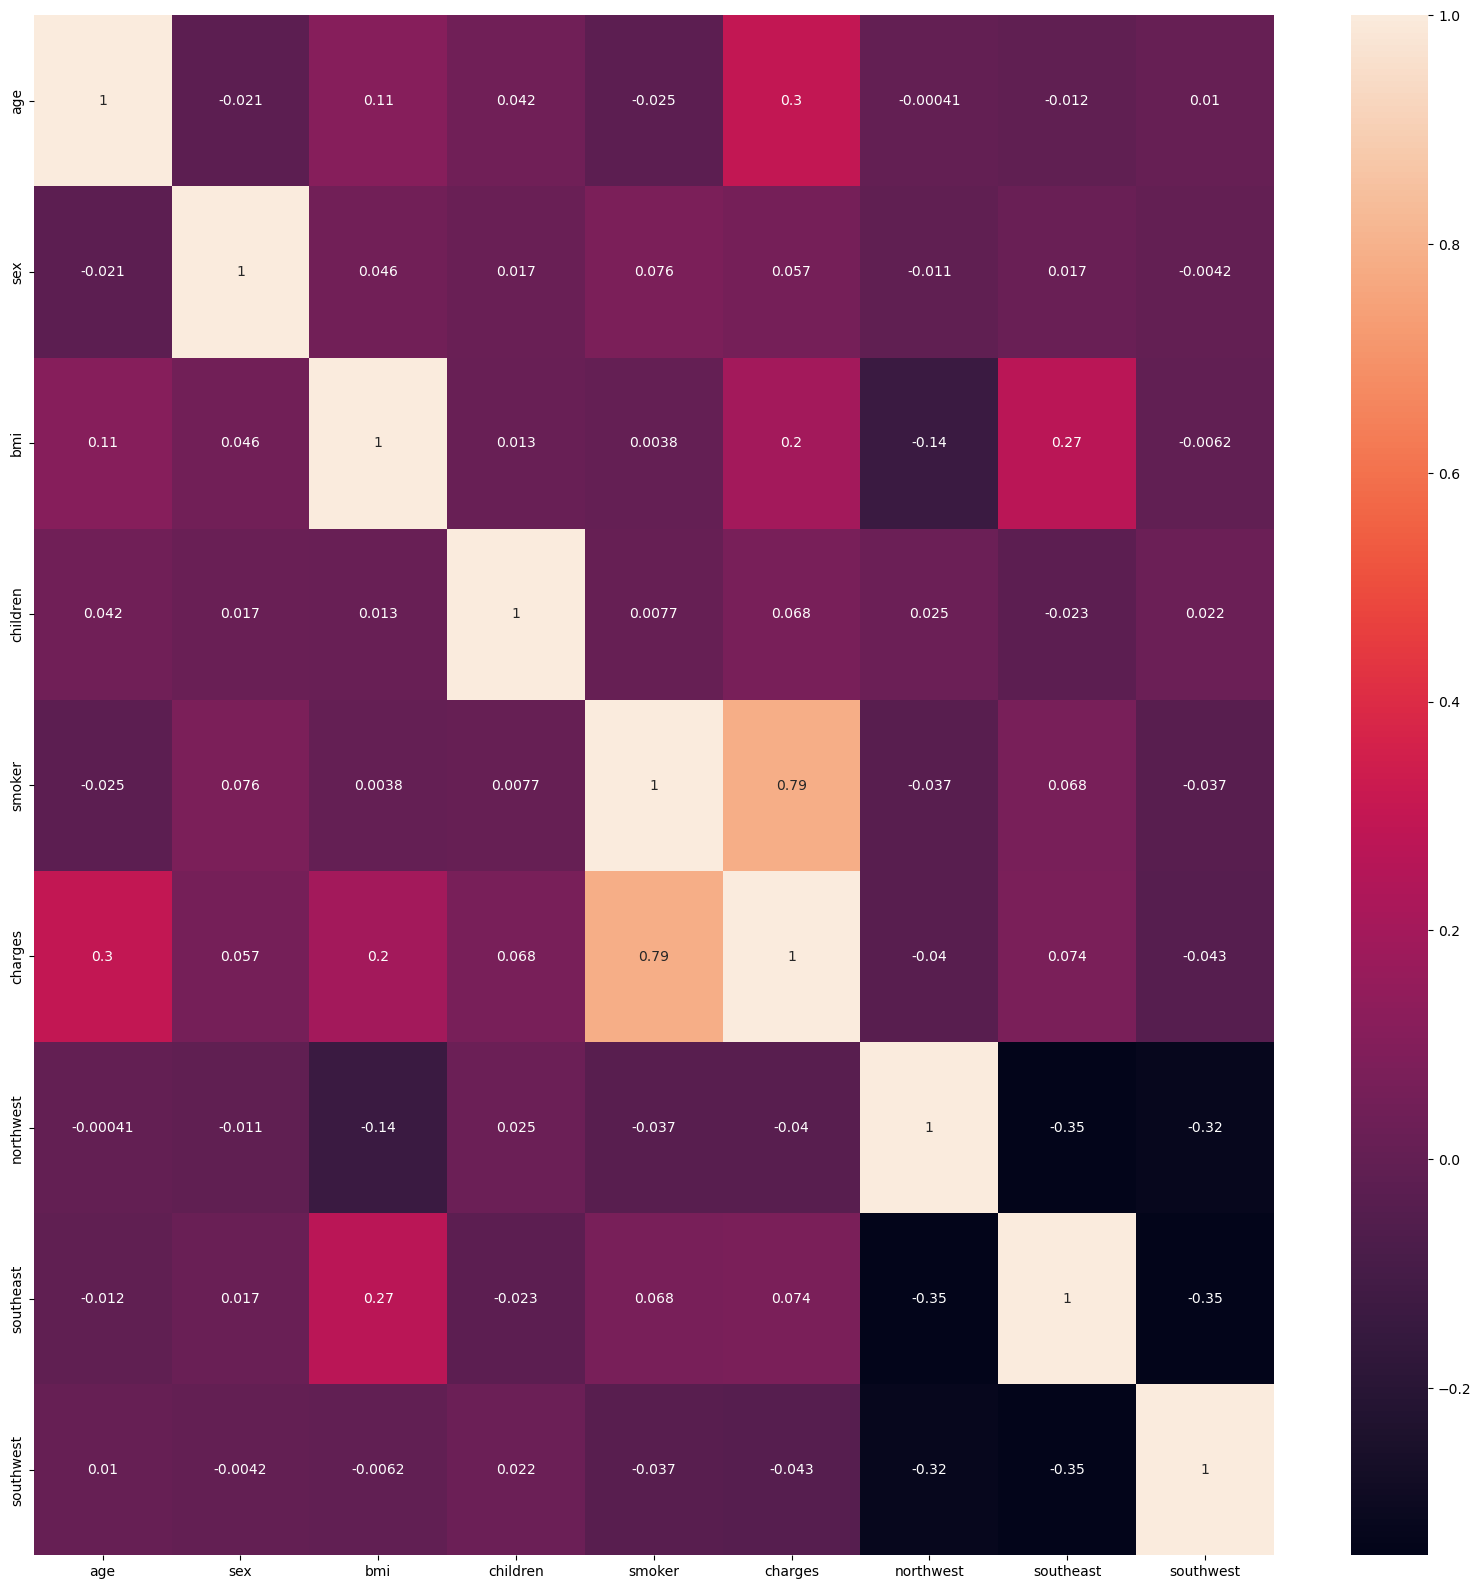

In [235]:
plt.figure(figsize= (20,20))
sns.heatmap(corr,annot=True)

## Create Training & Test Data

In [243]:
ins_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [245]:
# Separate Input and Outputs
X = ins_df.drop(columns = ['charges'] ) # X - all inputs
y = ins_df['charges'] # y - Output or the column we are trying to predict

In [247]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [249]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [253]:
# When using Linear Learner, Data Type should be float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [255]:
y =y.reshape(-1,1)
y

In [257]:
# Scale Data to feed to the Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X= scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y= scaler_y.fit_transform(y)

In [263]:
# Split data 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2)

In [265]:
X_train.shape

(1070, 8)

In [267]:
X_test.shape

(268, 8)

## Build Model using Sklearn

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train,y_train)

LinearRegression()

In [271]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test,y_test)
regression_model_sklearn_accuracy

0.7435387764215927

In [274]:
y_predict = regression_model_sklearn.predict(X_test)

In [276]:
y_predict

array([[-0.36454123],
       [-0.3352194 ],
       [ 1.521081  ],
       [-0.6140542 ],
       [-0.85975504],
       [ 1.6301352 ],
       [-0.48413286],
       [-0.24071935],
       [-0.7473011 ],
       [-0.98498565],
       [-0.45054278],
       [ 1.631615  ],
       [-0.5612754 ],
       [ 0.02888938],
       [-0.22429414],
       [-0.57928264],
       [-0.33127204],
       [-0.28983393],
       [ 1.1533387 ],
       [-0.35011062],
       [-0.9133401 ],
       [-0.31453234],
       [-0.30013835],
       [ 1.4592814 ],
       [-0.8791397 ],
       [-0.66322565],
       [-0.213754  ],
       [-0.68597233],
       [-0.24345563],
       [-0.35362723],
       [-0.87137854],
       [ 1.612641  ],
       [-0.7245714 ],
       [-0.78089905],
       [ 0.18544762],
       [ 0.15203191],
       [-0.5626021 ],
       [-0.15232007],
       [-0.7298819 ],
       [-0.3450254 ],
       [-0.1345755 ],
       [-0.12229748],
       [ 0.31357595],
       [ 0.3294783 ],
       [ 1.7553426 ],
       [-0

In [278]:
# scale back to normal values
y_predict_old = scaler_y.inverse_transform(y_predict)
y_test_old = scaler_y.inverse_transform(y_test)

In [282]:
k = X_test.shape[1]
n = len(X_test)
n

268

## Assess the model performance & analyze KPIs ( RMSE, MSE, MAE, r2, Adjusted r2 )

In [285]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_old,y_predict_old)),'3f'))
MSE = mean_squared_error(y_test_old,y_predict_old)
MAE = mean_absolute_error(y_test_old,y_predict_old)
r2= r2_score(y_test_old,y_predict_old)
adj_r2 = 1- (1-r2)*(n-1)/(n-k-1)
print('RMSE =',RMSE, '\n MSE = ', MSE, '\n MAE = ',MAE,'\n R2',r2,'\n Adjusted R2 =', adj_r2)

In [287]:
print('RMSE =',RMSE, '\n MSE = ', MSE, '\n MAE = ',MAE,'\n R2',r2,'\n Adjusted R2 =', adj_r2)

RMSE = 6326.710449 
 MSE =  40027264.0 
 MAE =  4401.8022 
 R2 0.7435387848376289 
 Adjusted R2 = 0.7356172029021117


## Train Linear Learner model using Amazon Sage Maker

In [ ]:
import sagemaker
import boto3

sagemaker_session = sagemaker.Session()

bucket = 'e2esa-sagemaker-demo'
prefix = 'linear_learner/insurance/health_insurance_price'

role = sagemaker.get_execution_role()
print(role)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
y_train = y_train[:,0]

In [ ]:
import io
import numpy as np
import sagemaker.amazon.common as smac

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf,X_train,y_train)
buf.seek(0)

In [ ]:
# Upload data to s3
import os
key = 'linear-train-data'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix,'train',key)).upload_fileobj(buf)
s3_train_data = 's3://{}/{}/train/{}'.format(bucket,prefix,key)
print('upload location: {}'.format(s3_train_data))

In [ ]:
s3_output_location= 's3://{}/{}/output'.format(bucket,prefix)
print('Output will be located in {}'.format(s3_output_location))

In [ ]:
# Get the training container
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name,'linear-learner')

In [ ]:
# All regression models in SageMaker is named as Estimator
linear = sagemaker.estimator.Estimator(container,
                                       role,
                                       train_instance_count =1,
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = s3_output_location,
                                       sagemaker_session = sagemaker_session,
                                       train_use_spot_instances = True,
                                       train_max_run = 300,
                                       train_max_wait = 600)

# feature_dim =1, - as we have only one independent variable 

linear.set_hyperparameters(feature_dim =1,
                           predictor_type = 'regressor',
                           mini_batch_size= 5,
                           epochs = 50,
                           num_models =32,
                           loss = 'absolute_loss')

linear.fit({'train':s3_train_data})

## Deploy trained model

In [ ]:
linear_regressor = linear.deploy(initial_instance_count =1,
                                instance_type = 'ml.m4.xlarge')

In [ ]:
from sagemaker.predictor import csv_serializer, json_deserializer

linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [ ]:
result = linear_regressor.predict(X_test)
result

In [ ]:
predictions = np.array([r['score'] for r in result['predictions']])
predictions

In [ ]:
predictions.shape

In [ ]:
# scale back to normal values
y_predict_old = scaler_y.inverse_transform(predictions)
y_test_old = scaler_y.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_old,y_predict_old)),'3f'))
MSE = mean_squared_error(y_test_old,y_predict_old)
MAE = mean_absolute_error(y_test_old,y_predict_old)
r2= r2_score(y_test_old,y_predict_old)
adj_r2 = 1- (1-r2)*(n-1)/(n-k-1)
print('RMSE =',RMSE, '\n MSE = ', MSE, '\n MAE = ',MAE,'\n R2',r2,'\n Adjusted R2 =', adj_r2)

## Terminate the deployment and environment

In [ ]:
linear_regressor.delete_endpoint()